## Log Transformations

## Introduction

In this lesson you will take a look at logarithmic transformations and when to apply them to features of a dataset. This will then become an effective technique you can use to improve the performance of linear regression models. Remember, linear regression models are meant to determine optimal coefficients in order to decompose an output variable as the linear combination of features. Transforming these initial features to have certain properties such as normality will improve the regression algorithms predictive performance.

## Objectives

You will be able to:

* Determine which features of a dataset might be appropriate for log transformations
* Apply logarithmic transformations to features of a dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Linear Regression Assumptions

Remember that linear regression operates under various assumptions including that the dependent variable can be decomposed into a linear combination of the independent features. Additionally, data should be homoscedastic and the residuals should follow a normal distribution.

One thing we briefly touched upon previously is the **distributions of the predictors**. In previous labs, you have looked at these distributions to have an understanding of what the distributions look like. In fact, you'll often find that having the data more normally distributed will benefit your model and model performance in general. So while normality of the predictors is not a mandatory assumption, having (approximately) normal features may be helpful for your model!

## A Model Using the Raw Features

To prove the point, let's look at a model using raw inputs that are not approximately normal. Afterwards, you'll take a look at how to identify when you can **transform your inputs** (log transformations) and validate the improvement that they provide for the model.

In [19]:
data = pd.read_csv("auto-mpg.csv")
data.head()

,Unnamed: 0,displacement,horsepower,weight,acceleration,mpg
0,0,307.0,130,3504,12.0,18.0
1,1,350.0,165,3693,11.5,15.0
2,2,318.0,150,3436,11.0,18.0
3,3,304.0,150,3433,12.0,16.0
4,4,302.0,140,3449,10.5,17.0


In [10]:
from statsmodels.formula.api import ols

In [15]:
outcome = 'mpg'
x_cols = ['displacement', 'horsepower', 'weight',
       'acceleration']
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     233.4
Date:                Thu, 07 Mar 2019   Prob (F-statistic):          9.63e-102
Time:                        10:51:41   Log-Likelihood:                -1120.6
No. Observations:                 392   AIC:                             2251.
Df Residuals:                     387   BIC:                             2271.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       45.2511      2.456     18.424      0.000      40.422      50.080
displacement    -0.0060      0.007     -0.894      0.372      -0.019       0.007
horsepower      -0.0436      0.017     -2.631      0.009      -0.076      -0.011
weight          -0.0053      0.001     -6.512      0.000      -0.007      -0.004
acceleration    -0.0231      0.126     -0.184      0.854      -0.270       0.224
==============================================================================
Omnibus:                       38.359   Durbin-Watson:                   0.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.333
Skew:                           0.715   Prob(JB):                     7.13e-12
Kurtosis:                       4.049   Cond. No.                     3.56e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Checking Variable Distributions

You do have an initial model displayed above, but this can be improved. The first step you should take prior to simply fitting your model is to see how each of the variables are related to one another.

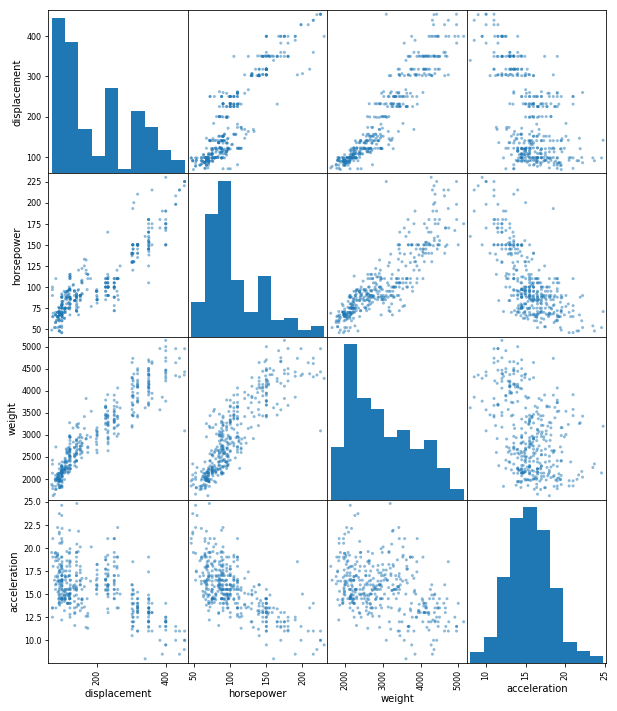

In [16]:
pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12));

## Logarithmic Functions

As you'll see below, one common option for transforming non-normal variable distributions is to try applying a logarithmic function and observe its impact of the distribution. As a helpful math review, let's take a look at a logarithmic curve. (Also remember that you can't take the logarithm of zero nor a negative number.)

/Users/matthew.mitchell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


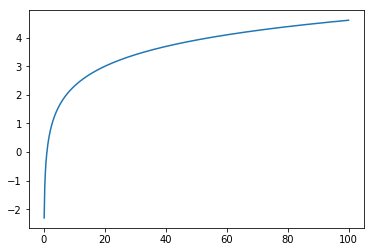

In [22]:
x = np.linspace(start=-100, stop=100, num=10**3)
y = np.log(x)
plt.plot(x, y)

## Transforming Non-Normal Features

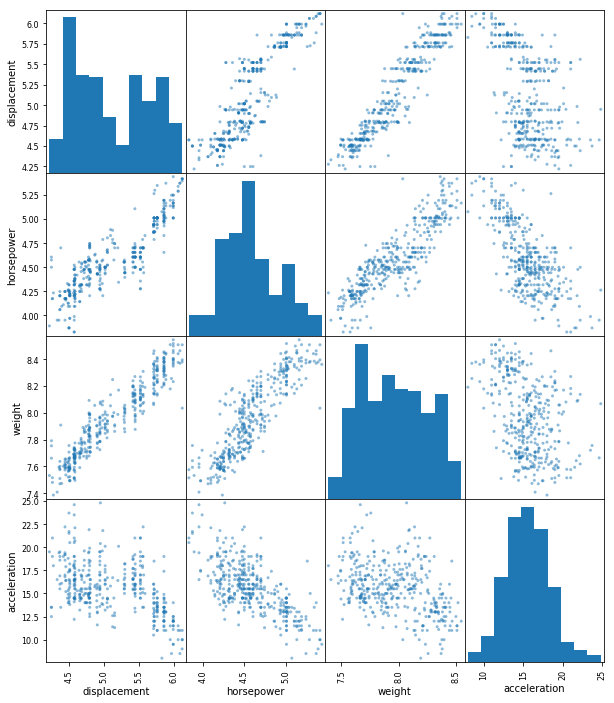

In [20]:
non_normal = ['displacement', 'horsepower', 'weight']
for feat in non_normal:
    data[feat] = data[feat].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12));

## A Model After Transforming Non-Normal Features

In [21]:
outcome = 'mpg'
x_cols = ['displacement', 'horsepower', 'weight',
       'acceleration']
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     286.5
Date:                Thu, 07 Mar 2019   Prob (F-statistic):          2.98e-114
Time:                        11:12:09   Log-Likelihood:                -1091.4
No. Observations:                 392   AIC:                             2193.
Df Residuals:                     387   BIC:                             2213.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      154.5685     12.031     12.847      0.000     130.913     178.223
displacement    -3.2705      1.219     -2.684      0.008      -5.667      -0.874
horsepower     -11.0811      1.911     -5.800      0.000     -14.837      -7.325
weight          -7.2456      2.753     -2.632      0.009     -12.658      -1.834
acceleration    -0.3760      0.131     -2.876      0.004      -0.633      -0.119
==============================================================================
Omnibus:                       40.779   Durbin-Watson:                   0.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.330
Skew:                           0.674   Prob(JB):                     1.07e-14
Kurtosis:                       4.456   Cond. No.                     1.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Observations

While not dramatic, you can observe that simply by transforming non-normally distributed features using log transformations, we have increase our $R^2$ value of the model from 0.707 to 0.748. 

## Summary

In this lesson, you got a quick review of logarithmic functions, and saw how they can be used to transform non normal distributions which can improve the performance of linear regression models.